## Take-Home Exam 2 : Statistics & Hypothesis Testing

*In this take-home exam, you are going to study hypothesis testing and related statistics concepts in more detail.*

**Submission Instructions**

---
Copy this assignment to your Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_th2`</font>.

Write your solutions in the cells  marked <font color = 'green'>`# your code`</font>.

When you're done please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


1.  Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.
2.   Then submit the <font color="red">`.ipynb`</font> version of your work on SUCourse.


For any question, you may send an email to the TAs and LAs.

---

In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from scipy import stats
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Question 1: t-Distributions & t-Test

> The **t-distribution** (aka, Student’s t-distribution) is a probability distribution that is used to estimate population parameters when the sample size is small and/or when the population variance is unknown.

> **Degrees of Freedom**: There are actually many different t-distributions. The particular form of the t-distribution is determined by its degrees of freedom. The degrees of freedom refers to the number of independent observations in a set of data. When estimating a mean score or a proportion from a single sample, the number of independent observations is equal to the sample size minus one. Hence, the distribution of the t-statistic from samples of size 8 would be described by a t-distribution having 8 - 1 or 7 degrees of freedom.

For further information regarding t-distribution you can check the [Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-distribution) and [StatTrek](https://stattrek.com/probability-distributions/t-distribution.aspx).

Now, below **you have a scenario where a t-distribution is needed to be utilized for hypothesis testing**.

---

**Question Scenario** : An iron company has a sample of 35 irons for which the monthly electric consumption is measured. The values can be observed in the list variable named `sample_values` below. In addition, engineers of the company initially had claims for **average monthly consumption of all irons to be 84 kWh**. However, the company finds the resulting consumption values **exceeding** the given claim. As a result, the company wants to know if the sampled 35 irons have a greater average monthly consumption than the estimated mean, 84 kWh.

---

In [0]:
sample_values = [
  87, 83, 84, 86, 85, 89, 81, 89, 81, 89, 87, 82, 88, 85, 87, 84, 87, 83,
  81, 82, 80, 89, 87, 82, 84, 81, 86, 81, 87, 89, 83, 80, 89, 85, 80
]

#### Task 1: Null and Alternative Hypotheses

From the given question above, please fill the null and alternative hypotheses definitions below.

<font color="blue">[Double click to fill in the blanks]</font>

$ H_0: $ μ=84 (average monthly consumption of all irons is 84 kWh)

$ H_1: $ μ>84 (average monthly consumption of all irons is greater 84 kWh)

#### Task 2: Type of the Hypothesis Testing
Are we conducting a left-tailed or a right-tailed hypothesis testing? Why?

This is a right tailed hypothesis testing because company wants to know if sampled irons have a **greater** average monthly comsumption than the expected mean, 84. Hence we are interested in the right side of the distribution as values increase to the right way. 

#### Task 3: t-Statistic

Since the sample we have is small and lacking inforformation regarding the actual population, we are going to utilize the t-distribution to model our data. In order to locate the sample mean, we'll deploy t-scores. You may think of it as a z-score, but defined for a t-distribution.

The formula for calculating the t-score is given below;

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/fefcbd88b2358228836cc4dc9e1a84f99765715d)

where 
  - $\bar{X}$ is sample mean,
  - $ \mu$ is the mean to be tested,
  - $S$ is the sample standard deviation,
  - $n$ is the sample size,
  - also the degree of freedom is $n-1$

Now, calculate the t value (t-test statistic) for the question.

*hint: You also need to calculate some of the metrics above.*

In [0]:
s=0
for observation in sample_values:
  s += observation
mean= s/len(sample_values)



s = 0
for observation in sample_values:
  s += (observation-mean)**2
var= s/len(sample_values)

std=np.sqrt(var)



t_score= (mean-84)/(std/np.sqrt(35))
print("t-score: {}".format(t_score))


t-score: 1.2780031950464963


#### Task 4: t-Distribution

In the rats' mean response time experiment, our alternative hypothesis stated that the sample's mean response time is less than the mean response time of the population. To this end, we obtained the corresponding z-score of the sample mean, our test statistic, and showed it on the population distribution. Then, calculated the required probability accordingly. 

In the figure below, we have a standard normal distribution and a z-score of -1.96. The blue shaded area represents a left-tailed test.

![](https://mat117.wisconsin.edu/wp-content/uploads/2014/12/section3-21.png)

Now using the t-distribution option from `scipy.stats`, plot a 0-centric t-distribution with the correct degrees of freedom and shade the area of interest in the question scenario for the appropriate test type.

*p.s. You may check the documentation for numpy implemantation of t-distribution from this [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t)*

0.8951696731890545


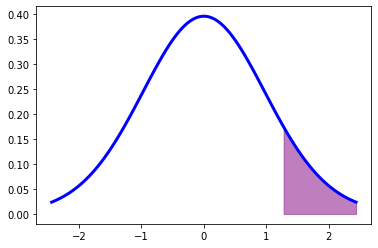

In [0]:
from scipy.stats import t
fig, ax = plt.subplots(1, 1)
number_of_samples=35
x_start=np.linspace(t.ppf(0.01,number_of_samples), t.ppf(0.99,number_of_samples),100)
x_end=np.linspace(t.ppf(t.cdf(1.278,number_of_samples),number_of_samples), t.ppf(0.99,number_of_samples),100)

y_start=t.pdf(x_start,number_of_samples)
y_end=t.pdf(x_end,number_of_samples)

ax.plot(x_start,y_start,'b', lw=3, alpha=1, label='t-distribution')
print(t.cdf(1.278,number_of_samples))
ax.fill_between(x_end, y_end, 0, facecolor='blue', color='purple', alpha=0.5)


#### Task 5: p-value and Test Result

By using the appropriate method of testing from `scipy.stats` conduct the hypothesis test needed for the question given. Then, by checking the resulting p-value, evaluate the scenario (accept or reject the null hypothesis? why?) with significance level ($\alpha$) set to 0.05. 

*p.s. By default, scipy's hypothesis testing functions perform two-tailed tests. In other words, the resulting p-values are calculated for the  two-tailed scenario. You should find a way to convert them to one-tail.*

In [0]:

stats.ttest_1samp(sample_values, 84)
# resulting p-values are calculated for the two-tailed

Ttest_1sampResult(statistic=1.2596137011307171, pvalue=0.2163871205395028)

In [0]:
p_value=(0.2163871205395028/2) #convert the p values to one tail
p_value

0.1081935602697514

"If the obtained p-value is less than or equal to the significance value, the null hypothesis is rejected, otherwise we fail to reject the null hypothesis."
I converted the resulting p value for the two-tailed scenario by dividing it by 2. I did so because my alternative hypothesis concerns a case for being greater(right tailed). My true p value is greater than significance value which is 0.05. Hence, I fail to reject the null hypothesis.In other words, we do not reject the null hypothesis. 

### Question 2: Two-tailed t-Test

For the second question, you will utilize the *TMDB 5000 Movie Dataset* from [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata#tmdb_5000_movies.csv). For the dataset, the csv file called `tmdb_5000_movies.csv` has already been shared with you.

Our objective is to check if there is any statistically significant difference between the IMBD ratings (named as `"vote_average"` in the dataset) of USA and non-USA made movies. Below, you may find the hypothesis setting.

$\mu_{us}$: avg. IMDB rating of US made movies  
$\mu_{non-us}$: avg. IMDB rating of non-US made movies

$H_0: \mu_{us} = \mu_{non-us}$  
$H_A: \mu_{us} \neq \mu_{non-us}$

#### Task 1: Preprocessing

As you can also check, some of the columns in the dataset need preprocessing. In this task, you need to write a function to be applied to the dataframe using the information in the column named `production_countries`. The function should be used for discriminating movies produced in the United States and movies produced in other countries. If a movie has multiple countries for production where United States is one of them, you should consider it as United States made as well. Apply your function to create a new column, named `"made_where"`. Lastly, show the top 3 rows of the resulting dataframe. 

In [0]:
df = pd.read_csv(join(path_prefix, "tmdb_5000_movies.csv"))
df.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


In [0]:
#I realized that some of the production country infos are just "[]", 
#this will lead to biased results since we do not know exactly which country it belongs,
#hence, I dropped these kind of data. 
df = df.drop(df[df.production_countries == "[]"].index)
df.tail()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://www.primermovie.com,14337,"[{""id"": 1448, ""name"": ""distrust""}, {""id"": 2101...",en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,"[{""name"": ""Thinkfilm"", ""id"": 446}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What happens if it actually works?,Primer,6.9,658
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


In [0]:
def country_finder(d):
  if "United States" in d: #if there is United States, it is enough to label it as USA, even if there is other countries along with USA
    return 'United States'
  else:
    return 'other'

df['made_where'] =df["production_countries"].apply(country_finder)
df.iloc[:3] #showing top 3 row

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,made_where
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,United States
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,United States
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,United States


#### Task 2: Visualizing the Rating Distributions

Before applying the hypothesis testing, plot the distributions of ratings of movies from US and movies from other countries **in the same figure**. To this end, you may plot both ratings as histograms or seaborn kdeplots as we did in the hypothesis testing recitation.

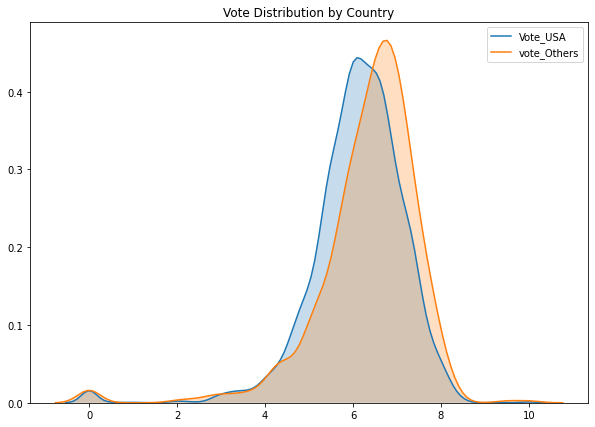

In [0]:
#I took vote_average as parameter, in order to compare the ratings
vote_USA = df[df["made_where"] == "United States"]["vote_average"]
vote_Others = df[df["made_where"] == "other"]["vote_average"]
fig, ax = plt.subplots(1,1, figsize=(10,7))

sns.kdeplot(vote_USA, shade=True, ax=ax, label="Vote_USA")
sns.kdeplot(vote_Others, shade=True, ax=ax, label="vote_Others")

plt.title("Vote Distribution by Country")
plt.show()

#### Task 3: Comparing Ratings from US and Other Countries

In this section, you need to test whether there is significant difference in the rating distributions of the movies produced in the US and films produced in other countries.

Now, by utilizing the new column you created, test whether ratings of movies from US and from other countries differ significantly. Again, you can utilize the `stats.ttest_ind`.

Then, evaluate the results of the hypothesis testing you conducted with significance level ($\alpha$) set to 0.05. 

In [0]:

stats.ttest_ind(vote_USA, vote_Others, equal_var=False)

Ttest_indResult(statistic=-4.836850324241118, pvalue=1.559835435159303e-06)

If we set the significance level as 0.05, p value is smaller than the significance level.So, we can reject the null hypothesis which states that there is no difference between average IMDB rating of USA made movies and none-US made movies. Hence, we accept the alternative; "there is significant difference in the rating distributions of the movies produced in the US and films produced in other countries."

### Question 3: Chi-Square Test of Independence

> **Chi-Square Test** can be used to test the independence of two categorical variables. However, to determine the critical value, we need to determine the degrees of freedom. In Chi-square tests, the degree of freedom value is determined by $(r-1)(c-1)$ where $r$ is the number of rows and $c$ is the number of the columns in the contingency table (crosstab). From the image below, you can find corresponding threshold values for varying degrees of freedom and threshold critical probability $\alpha$.

<img src="https://www.mun.ca/biology/scarr/IntroPopGen-Table-D-01-smc.jpg" width="400" height="400" />



For this question, you will use the `adults.csv` that is shared with you, which is a modified version of [this dataset](https://archive.ics.uci.edu/ml/datasets/Adult/). You will check for the statistical dependence between features `education` and `marital-status`.

In the following test, our hypotheses setting is the following:

$H_0$: `Education` and `Marital Status` are independent variables.

$H_A$: `Education` and `Marital Status` are **not** independent variables.

In [0]:
adults_df = pd.read_csv(join(path_prefix, "adults.csv"), index_col=False)
adults_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,High-school,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,High-school,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [0]:
adults_df.isna().sum() / adults_df.shape[0] * 100.00 #Ichecked the NaN values just in case, there is no null value it is good.

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
dtype: float64

#### Task 1: Creating the Contingency Table

> A contingency table is a special type of frequency distribution table that displays the frequency counts of two categorical variables.

By using `pd.crosstable`, create an appropriate table format to apply Chi-Square test on features `education` and `marital-status`.

*hint: You may check the related recitation material.*

In [0]:
education = pd.crosstab(adults_df["education"], adults_df["marital-status"])
education

marital-status,Divorced,Married,Never-married
education,,,
Bachelors,720,2840,1795
Doctorate,47,293,73
High-school,3288,6751,4664
Masters,299,1020,404
Preschool,5,24,22
Some-college,2102,4489,3725


In [0]:
education_norm = pd.crosstab(adults_df["education"], adults_df["marital-status"], normalize='index')*100
education_norm #norm refers row-wise normalized to 100

marital-status,Divorced,Married,Never-married
education,,,
Bachelors,13.445378,53.034547,33.520075
Doctorate,11.380145,70.944310,17.675545
High-school,22.362783,45.915799,31.721417
Masters,17.353453,59.199071,23.447475
Preschool,9.803922,47.058824,43.137255
Some-college,20.376115,43.514928,36.108957


#### Task 2: Visualizing the Crosstable

Create a *stacked bar chart* for the **row-wise normalized** crosstable, where the bars are grouped by education levels, so that any dependency should be visualy noticable. 

An exemplary figure can be found below.

<img width="700" height="300" src="https://i.ibb.co/cTx8VQ4/pm.png" />

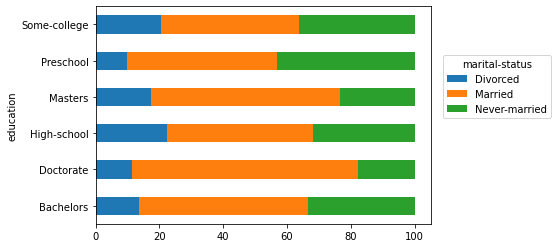

In [0]:
#I use the normalized version crosstable

education_norm.plot.barh(stacked=True)
plt.legend(title='marital-status',loc='upper center',bbox_to_anchor=(1.2, 0.8))
plt.show()



#### Task 3: Computing The Chi-Square Test Statistic

For this task, you are going to implement the Chi-Square Test from scratch. In the previous task, you created a contingency table that summarizes the relationship between two categorical variable by storing the frequencies, called **observations**, in each corresponding cell.  However, in order to observe the significance of these observations, we need to obtain **expected frequencies** which specify what the values of each cell of the contingency table would be if there was no association between the two variables. Once you obtain the expected frequencies, you can calculate the test statistic quite easily.

Below you can find the detailed instructions to perform the test.

1. Compute the contingency table.

2. Calculate expected frequencies
  - For a particular cell located at $i^{th}$ row and $j^{th}$ column, the expected frequency is $\large{\frac{(f_i*f_j)}{total}}$, where $f_i$ is the total frequency in row i and $f_j$ is the total frequency in column j. In parallel, $total$ is the overall frequency.

  - For instance, in the contingency table below, red numbers represent row and column totals, whereas the blue value represents the total frequency. The expected frequency of cell [over 30, analog], highlighted as green, can be calculated as $\large{\frac{(60*80)}{200}}$.

| |  | Watching | Preference | |
|:-:|:-:|:-:|:-:|:-:|
| Age	|	digital | 	analog |	undecided |
| under 30 | 	90 | 	40 |	10 |	<font color="red">140</font>
| over 30 |	10 |	**<font color="green">40<font>** |	10 |	<font color="red">60</font>
|	| <font color="red">100</font> | 	<font color="red">80</font> |	<font color="red">20</font> | 	<font color="blue">200</font>

3. Compute the Chi-squared statistic.

  - $\chi^2 = \sum \Large{\frac{(f_o-f_e)^2}{f_e}}$, where $f_o$ and $f_e$ are the observed and expected frequencies, respectively.

  - For each cell in the contingency table, you are going to compute the residual, $f_o-f_e$, take its square and divide it to $f_e$. And finally sum all the results, so that you will obtain the chi2 test statistic, $\chi^2$.

4. Find the Degrees of Freedom

  - $(r-1)(c-1)$, where $r$ is the number of rows and $c$ is the number of the contingency table.

5. Obtain the p-value.

  - Use scipy's `chdtrc` function to calculate the p-value. The sample usage can be found below.

  ```py
  >>> from scipy.special import chdtrc
    # dof -> degrees of freedom
    # chi2_stat -> obtained chi2 statistic
  >> chdtrc(dof, chi2_stat)
  ```

You can always test your results with the `scipy.stats.chi2_contingency` as we did in recitation 6.

You may also check the link below to observe an exemplary setup.

https://stattrek.com/chi-square-test/independence.aspx

Once you perform the steps above, print the obtained $\chi^2$ and corresponding p-value.

In [0]:
education_n = pd.crosstab(adults_df["education"], adults_df["marital-status"],margins=True)
education_n #_n refers to new, because this time it contains the sums

marital-status,Divorced,Married,Never-married,All
education,,,,
Bachelors,720,2840,1795,5355
Doctorate,47,293,73,413
High-school,3288,6751,4664,14703
Masters,299,1020,404,1723
Preschool,5,24,22,51
Some-college,2102,4489,3725,10316
All,6461,15417,10683,32561


In [0]:
observed = education_n.iloc[0:6, 0:3] #my observed data consist of first 6 row and firs 3 colums, others are sums
expected =  np.outer(education_n["All"][0:6], education_n.loc["All"][0:3]) / education.sum().sum()
expected = pd.DataFrame(expected)
expected.columns = ["Divorced", "Married", "Never-married"]
expected.index = ["Bachelors", "Doctorate", "High-school", "Masters", "Preschool", "Some-Collage"]
expected #I cereate new df with calculated expected values

,Divorced,Married,Never-married
Bachelors,1062.579620,2535.488314,1756.932066
Doctorate,81.950585,195.547465,135.501950
High-school,2917.480513,6961.584442,4823.935045
Masters,341.890697,815.806978,565.302325
Preschool,10.119806,24.147508,16.732686
Some-Collage,2046.978778,4884.425294,3384.595928


In [0]:
chi2_test_statistic=0
for i in range (6):
  for j in range(3): ##I iterate over every cell in the datas
    chi2_test_statistic= chi2_test_statistic+  ((observed.iloc[i][j]-expected.iloc[i][j])**2)/expected.iloc[i][j]
print("χ2:")
chi2_test_statistic

χ2:


473.3673276295488

In [0]:
from scipy.special import chdtrc #I am using scipy's chdtrc function to calculate the p-value
dof=(6-1)*(3-1)
print( "p value: " )
print (chdtrc(dof, chi2_test_statistic))

p value: 
2.154881153496343e-95


In [0]:
stats.chi2_contingency(education) #to check ıf I found the correct values

(473.36732762954875,
 2.1548811534964046e-95,
 10,
 array([[1062.57961979, 2535.48831424, 1756.93206597],
        [  81.95058506,  195.54746476,  135.50195019],
        [2917.4805135 , 6961.58444151, 4823.93504499],
        [ 341.89069746,  815.80697767,  565.30232487],
        [  10.1198059 ,   24.14750775,   16.73268634],
        [2046.97877829, 4884.42529406, 3384.59592764]]))

#### Task 4: Conclusion

Compare the obtained p-value and $\alpha$ (0.05), then evaluate your hypotheses.

Our p value is 2.154881153496343e-95 which is smaller than the significance level (0.05).Therefore, we can not accept the null hypothesis.We reject the null hypothesis which states that education and marital status are independent variables. So we conclude that,education and marital status are not independent variable, we accept alternative hypothesis. 



